In [1]:
!conda install numpy pandas matplotlib watermark -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.



In [2]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

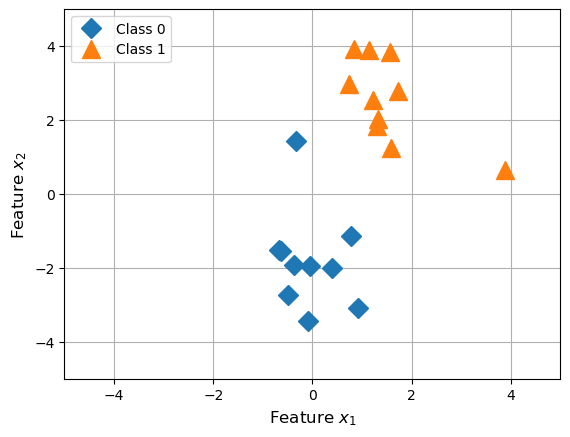

In [4]:
import matplotlib.pyplot as plt


plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

In [5]:
class Perceptron:

    def __init__(self, num_features: int):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

In [6]:
ppn = Perceptron(num_features=2)

In [7]:
class Perceptron:

    def __init__(self, num_features: int):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0


    def forward(self, x):

        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

In [20]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]
ppn.forward(x)

0

In [44]:
import random

class Perceptron:

    def __init__(self, num_features: int):
        self.num_features = num_features
        self.weights = [random.random() for _ in range(num_features)]
        self.bias = 0.0
        self.learning_rate = 0.1


    def forward(self, x):

        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)

        error = true_y - prediction

        #update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += self.learning_rate * error * x[i]

        return error

In [39]:
ppn = Perceptron(num_features=2)

x = [1.1, 2.1]

ppn.update(x, true_y=1)

0

In [40]:
print("Model parameters:")
print("  Weights:", ppn.weights)
print("  Bias:", ppn.bias)

Model parameters:
  Weights: [0.18197506554214204, 0.43917553704288725]
  Bias: 0.0


In [41]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        if error_count == 0:
            break

        print(f"Epoch {epoch + 1} errors {error_count}")



In [45]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=50)

Epoch 1 errors 1


In [34]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)


In [35]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [36]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

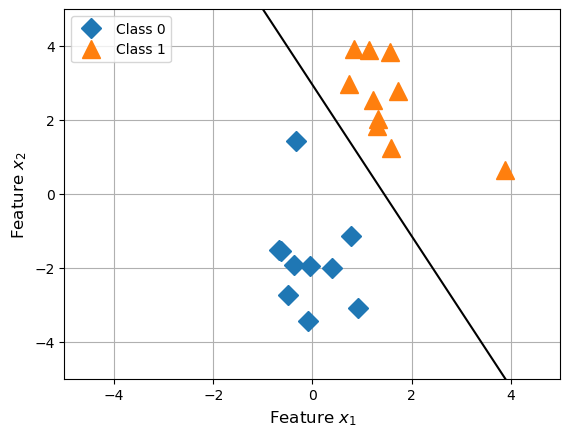

In [46]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()
